## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

In [4]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

In [6]:
# double checking
unique_users = df['user_id'].unique()

In [7]:
unique_users

array([851104, 804228, 661590, ..., 734608, 697314, 715931])

In [8]:
len(unique_users)

290584

d. The proportion of users converted.

In [9]:
# find the proportion of 1's in converted column - but only for unique users
num_converted = df[df['converted'] == 1]

In [10]:
num_converted.head()

,user_id,timestamp,group,landing_page,converted
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
15,644214,2017-01-22 02:05:21.719434,control,old_page,1


In [11]:
num_converted.shape

(35237, 5)

In [12]:
prop_users = len(num_converted.index)/len(df.index)
prop_users

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [13]:
df_not_match = df.query('(group == "treatment" and landing_page == "old_page") or (group == "control" and landing_page=="new_page")')

In [14]:
df_not_match.head()

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0


In [15]:
df_not_match.shape

(3893, 5)

f. Do any of the rows have missing values?

In [16]:
# Null values?
df[df.isnull().any(axis = 1)]
# no missing values

,user_id,timestamp,group,landing_page,converted


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [18]:
# since we do not know which page this row received, we need to drop the rows
df2 = df.drop(df.index[df_not_match.index])

In [19]:
df2.shape

(290585, 5)

In [20]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [21]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [22]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [23]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [24]:
df2.drop([2893], inplace=True)

In [25]:
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [26]:
# this is the probability of converted == 1
df_convert = df2[df2['converted'] == 1]
df_convert.head()

,user_id,timestamp,group,landing_page,converted
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
15,644214,2017-01-22 02:05:21.719434,control,old_page,1


In [27]:
prop_convert = len(df_convert.index)/len(df2.index)
prop_convert

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [28]:
# for those who were in the control group probability that they converted
control_group = df2[df2['group']=='control']
control_group.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [29]:
control_convert = control_group[control_group['converted']==1]
control_convert.head()

,user_id,timestamp,group,landing_page,converted
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
15,644214,2017-01-22 02:05:21.719434,control,old_page,1
28,913579,2017-01-24 09:11:39.164256,control,old_page,1
36,831737,2017-01-11 21:18:20.911015,control,old_page,1
43,862225,2017-01-08 14:49:37.335432,control,old_page,1


In [37]:
prop_control_convert = len(control_convert.index)/ len(control_group.index)
prop_control_convert

0.1203863045004612

In [39]:
num_control = len(control_group.index)
num_control

145274

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [31]:
treatment_group = df2[df2['group']=='treatment']
treatment_group.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [32]:
num_treatment = len(treatment_group.index)
num_treatment

145310

In [33]:
treatment_convert = treatment_group[treatment_group['converted'] == 1]
treatment_convert.head()

,user_id,timestamp,group,landing_page,converted
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
17,888545,2017-01-08 06:37:26.332945,treatment,new_page,1
26,892356,2017-01-05 09:35:14.904865,treatment,new_page,1


In [34]:
num_t_conv = len(treatment_convert.index)
num_t_conv

17264

In [35]:
num_t_conv/num_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [36]:
new_pages = df2[df2['landing_page']=='new_page']
len(new_pages.index)/len(df2.index)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

#### Answer:
Given the probability of conversions for the control group as approximately 12% and the probability of treatment group conversions as approximately 12%, it seems as though there is insufficient evidence to say that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### Answer:

𝐻0: P𝑜𝑙𝑑 >= P𝑛𝑒𝑤 
 
𝐻1: Pnew > Pold

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [50]:
# We are assuming that under the null, the success rate is equal to the converted success rate so both pnew and pold
# will be equal to prop_convert
prop_convert

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [51]:
prop_convert

0.11959708724499628

c. What is $n_{new}$?

In [58]:
n_new = df2.query('group == "treatment"')
n_new = len(n_new.index)
n_new

145310

d. What is $n_{old}$?

In [60]:
n_old = df2.query('group == "control"')
n_old = len(n_old.index)
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [77]:
new_page_converted = np.random.choice([0,1],n_new, p=(1-prop_convert,prop_convert))  
new_page_prop = new_page_converted.mean()
new_page_prop

0.11878053815979629

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [78]:
old_page_converted = np.random.choice([0,1],n_new, p=(1-prop_convert,prop_convert)) 
old_page_prop = old_page_converted.mean()
old_page_prop

0.1198128139838965

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [84]:
obs_diff = new_page_prop - old_page_prop

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [80]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1],n_new, p=(1-prop_convert,prop_convert))  
    new_page_prop = new_page_converted.mean()
    old_page_converted = np.random.choice([0,1],n_new, p=(1-prop_convert,prop_convert)) 
    old_page_prop = old_page_converted.mean()
    p_diffs.append(new_page_prop - old_page_prop)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

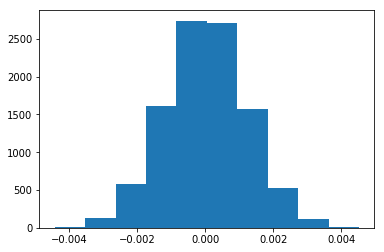

In [81]:
# Convert to numpy array
p_diffs = np.array(p_diffs)

# Plot sampling distribution
plt.hist(p_diffs);

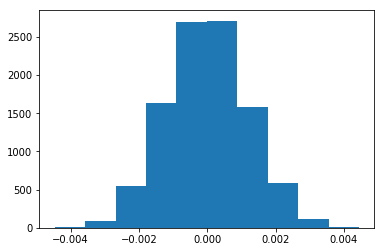

In [82]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

# Plot the null distribution
plt.hist(null_vals);

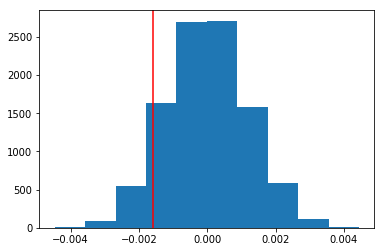

In [83]:
# Plot observed statistic with the null distibution

plt.hist(null_vals);
plt.axvline(obs_diff, c='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [88]:
# Compute p-value
(null_vals < obs_diff).mean()

0.986

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### Answer:

This value is the p-value and it tells us that there is not evidence to support that the new page receives more conversions than the old page because the p-value is > alpha = 0.05.



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [89]:
old_pages = df2[df2['landing_page']=='old_page']

In [90]:
import statsmodels.api as sm

convert_old = len(control_convert.index)
convert_new = len(treatment_convert.index)
n_old = len(old_pages.index)
n_new = len(new_pages.index)

In [107]:
convert_new

17264

In [108]:
convert_old

17489

In [109]:
n_old

145274

In [110]:
n_new

145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [125]:
# I found on this page:https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportions_ztest.html
# that I had to change the parameter 'alternative' to smaller because I am comparing if the old or null hypothesis
# is smaller than the alternative.  If I change the order of my values, I would enter 'larger'.  Either way
# I get the same results.
sm.stats.proportions_ztest([convert_new, convert_old],[n_new, n_old], alternative='larger')

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

#### Answer:

According to some research I found on this website: http://resources.esri.com/help/9.3/arcgisdesktop/com/gp_toolref/spatial_statistics_toolbox/what_is_a_z_score_what_is_a_p_value.htm

I see that the z-score falls within the critical range of -1.96 and +1.96 which tells me that the p-value will be large, which I can also see from the p-value in my calculations above.
The p-value of ~0.905 is much greater than the p-value associated with 95% confidence value or alpha = 0.05.  Both of these values confirm that there is insufficient evidence to reject the null hypothesis.  These results agree with my findings in parts j and k although the results are not exactly the same as mine.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#### Answer:

Given that we are looking at regression for categories vs. numerical regression, I would use logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [116]:
# create dummy vars
df2[['control', 'ab_page']] = pd.get_dummies(df['group'])


In [117]:
df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [119]:
df2['intercept'] = 1

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [121]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

In [122]:
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [123]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Jun 2019   Pseudo R-squ.:               8.077e-06
Time:                        21:13:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

#### Answer:
 The p-value associated with ab_page is 0.190, which was the value that resulted when I ran stats.proportions_ztest without changing the default 'alternative' parameter to larger, b/c this is giving the p-value for a 'two-sided' test instead of what we are looking for which is a 'one-sided' test to see if the alternative treatment page is greater than the old page conversions.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### Answer:

Adding additional factors to our model has the potential of creating a better model that is more predictive of conversion rates, however, it is always a good idea to choose the model with the least number of features that still performs as well.  So in some cases, more features can create a model that is overfit, and less able to generalize to other datasets.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [126]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [127]:
### Create the necessary dummy variables

In [128]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [135]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [136]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 834778 to 934996
Data columns (total 8 columns):
country         290584 non-null object
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
control         290584 non-null uint8
ab_page         290584 non-null uint8
dtypes: int64(2), object(4), uint8(2)
memory usage: 26.1+ MB


In [148]:
# change values to strings
df_new['country'].apply(str)

user_id
834778    UK
928468    US
822059    UK
711597    UK
710616    UK
909908    UK
811617    US
938122    US
887018    US
820683    US
697357    US
748296    US
666132    UK
668810    UK
940939    US
646414    US
907385    US
698200    US
738692    US
724651    US
662682    US
639818    US
920941    US
804632    US
684798    UK
766270    UK
857817    UK
750698    UK
721445    US
744732    UK
          ..
834931    UK
667920    US
869193    US
737522    US
937048    UK
689274    UK
916713    US
894324    US
816587    US
905950    US
865612    US
766165    US
664716    US
893381    UK
746186    UK
815837    US
646239    US
703088    US
758018    UK
663071    UK
635122    US
757673    UK
870839    US
659679    US
674173    US
653118    US
878226    UK
799368    UK
655535    CA
934996    UK
Name: country, Length: 290584, dtype: object

In [149]:
# create dummy vars
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new['country'])

In [151]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,UK,US,CA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [153]:
# build the logistic regression model:

lm = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'CA']])

In [154]:
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [155]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 Jun 2019   Pseudo R-squ.:               2.323e-05
Time:                        21:40:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0506      0.028      1.784      0.074      -0.005       0.106
CA             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

#### Answer:
It doesn't appear that country has an impact on conversion because neither US or CA have significant p-values.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [162]:
# I found this site from Udacity Knowledge QA:http://www.cantab.net/users/filimon/cursoFCDEF/will/logistic_interact.pdf
# this site tells me that interaction variables for categorical variables is the columns multiplied:

df_new['int_CA'] = df_new['CA'] * df_new['ab_page']
df_new['int_US'] = df_new['US'] * df_new['ab_page']
df_new['int_UK'] = df_new['UK'] * df_new['ab_page']

In [163]:
df_new.head(5)

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,UK,US,CA,int_CA,int_US,int_UK
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,1,0


In [164]:
# build the logistic regression model:

lm = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'CA', 'int_US', 'int_CA']])

In [166]:
### Fit Your Linear Model And Obtain the Results
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [167]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 24 Jun 2019   Pseudo R-squ.:               3.482e-05
Time:                        21:52:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0118      0.040      0.296      0.767      -0.066       0.090
CA             0.0175      0.038      0.465      0.642      -0.056       0.091
int_US         0.0783      0.057      1.378      0.168      -0.033       0.190
int_CA         0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

#### Answer:

I still do not see any of the features to be statistically significant in predicting conversion rate give p-values.  Overall, all of these tests confirm the pr

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.